# Gold Extraction Optimization

You work for the industrial efficiency company Zyfra. Your task is to optimize the process of extracting gold from gold ore.
Steps to improve extraction:

- Collect data on gold ore extraction and purification: ore quality, volume, and recovery efficiency.
- Build a model to predict the amount of gold that can be extracted from the ore.
- Optimize production by eliminating non-profitable parameters based on the model's predictions.
- Select the most efficient extraction and purification process with the highest gold yield.

You have data on the gold extraction process at various stages. The parameters for each stage of the extraction and purification process are known. Create a model that helps choose the most efficient and profitable process. Analyze predictions and potential improvements using machine learning techniques.

# Data Description

Features (selected for model training):

- `primary_cleaner.input.sulfate`: Amount of sulfate (sodium sulfide) added during the primary purification stage.
- `primary_cleaner.input.depressant`: Amount of depressant (usually a type of polymer) added during the primary purification stage.
- `primary_cleaner.input.feed_size`: Particle size in the feed of the primary purification stage.
- `primary_cleaner.input.xanthate`: Amount of xanthate added during the primary purification stage.
- `rougher.input.feed_ag`: Silver concentration in the feed to the flotation process.
- `rougher.input.feed_pb`: Lead concentration in the feed to the flotation process.
- `rougher.input.feed_rate`: Feed rate of mineral mixture to the flotation process.
- `rougher.input.feed_size`: Size of mineral particles in the feed to the flotation process.
- `rougher.input.feed_sol`: Concentration of dissolved solids in the feed to the flotation process.
- `rougher.input.feed_au`: Concentration of gold in the feed to the flotation process.
- `rougher.input.floatbank10_sulfate`: Amount of sulfate added in the flotation process in flotation cell 10.
- `rougher.input.floatbank10_xanthate`: Amount of xanthate added in the flotation process in flotation cell 10.
- `rougher.input.floatbank11_sulfate`: Amount of sulfate added in the flotation process in flotation cell 11.
- `rougher.input.floatbank11_xanthate`: Amount of xanthate added in the flotation process in flotation cell 11.
- `final.output.recovery`: Gold recovery after purification.
- `rougher.output.recovery`: Gold recovery after flotation.

Each row in the dataset corresponds to a measurement taken at a specific stage of the gold extraction process. Each measurement consists of various parameters such as the type of raw material, added reagents, feed particle size, gold concentration, etc.

# Initialization

In [75]:
# Load libraries

# Data manipulation
import pandas as pd
import numpy as np

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Preprocessing
import scipy.stats as st 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [76]:
# Load the data into DataFrames
df_full = pd.read_csv('../datasets/gold_recovery_full.csv')
df_test = pd.read_csv('../datasets/gold_recovery_test.csv')
df_train = pd.read_csv('../datasets/gold_recovery_train.csv')

# Prepare data

In [77]:
# Print the general/summary information about the DataFrame
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [78]:
# Print a random sample of 5 rows from the DataFrame
df_full.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
14462,2017-09-08 13:59:59,2.963245,11.528887,10.534130,46.613932,63.917755,6.307692,3.596931,10.849682,2.509539,...,12.030792,-501.496047,9.081051,-400.767843,14.023367,-501.655583,9.096030,-500.162176,14.996446,-502.372953
7329,2016-11-15 08:59:59,5.006578,10.464479,10.398627,44.483477,71.002490,10.282985,3.225707,10.767182,3.251789,...,15.981340,-500.244975,14.010504,-502.598660,16.719267,-500.864228,13.990617,-500.318540,22.000688,-501.892695
10654,2017-04-02 21:59:59,7.613659,11.484130,11.259418,38.403364,68.405095,8.355828,2.905632,13.573538,2.867023,...,25.006046,-403.266074,22.970529,-400.633023,22.932006,-451.851118,20.790910,-450.100683,30.025891,-500.124559
16692,2017-12-10 11:59:59,2.357315,9.033952,10.674973,45.461864,72.790941,10.788876,1.627776,14.861515,3.200697,...,20.031258,-500.216963,14.895141,-148.520223,10.938688,-501.381389,7.971075,-499.943049,11.988770,-502.050231
6643,2016-10-17 18:59:59,4.987553,9.058021,11.388296,47.254605,63.125137,12.178792,3.532301,10.776079,5.194906,...,20.016883,-498.454551,15.024108,-499.260339,8.718153,-497.571633,14.035281,-500.102321,23.453670,-498.313873


In [79]:
# Print the general/summary information about the DataFrame
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [80]:
# Print a random sample of 5 rows from the DataFrame
df_test.sample(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2098,2016-11-27 10:59:59,177.771376,6.034728,7.58,1.006127,1601.588892,-499.136404,1601.949201,-500.479852,1601.852469,...,18.003579,-500.264082,15.917997,-515.587318,17.781128,-499.084108,12.001598,-499.849168,21.977315,-499.114858
2923,2016-12-31 19:59:59,110.108169,8.988074,7.66,1.192022,1675.276248,-500.223060,1664.912233,-499.637216,1601.034709,...,17.011293,-500.788437,14.958993,-494.666216,14.378291,-501.395839,11.999972,-500.070159,19.983738,-500.958553
1265,2016-10-23 17:59:59,148.981691,5.427967,7.20,0.907308,1561.169965,-499.395568,1697.487448,-499.645375,1702.891262,...,20.003713,-500.383662,16.915040,-499.640602,16.980998,-503.396706,13.879070,-500.272585,24.996131,-503.540769
3726,2017-10-04 06:59:59,166.887328,6.494896,7.00,1.493500,1585.096352,-499.942977,1599.964450,-500.636159,1603.964079,...,16.974314,-500.160141,15.035820,-400.406692,13.050240,-499.994516,11.028996,-499.867232,15.014301,-500.121180
2381,2016-12-09 05:59:59,154.469114,10.993859,7.70,1.092109,1496.673535,-500.135405,1497.311479,-500.023929,1500.873382,...,18.038472,-500.979716,16.018027,-501.941668,16.813063,-500.227326,12.023747,-499.645098,20.991243,-499.696291


In [81]:
# Print the general/summary information about the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [82]:
# Print a random sample of 5 rows from the DataFrame
df_train.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
13978,2018-04-20 09:59:59,5.245666,8.560860,9.578679,47.817108,67.662425,13.692662,2.306117,5.483192,2.878759,...,27.057285,-504.840457,20.006132,-501.408641,19.944892,-501.318925,14.981998,-500.407381,15.007952,-501.783737
11814,2018-01-20 05:59:59,5.968594,8.819423,14.419413,43.207857,72.515538,11.405393,2.075223,5.813412,3.422899,...,20.052088,-500.837923,15.002728,-500.249410,10.981647,-499.224336,9.024495,-500.093545,11.016399,-499.624110
880,2016-02-20 16:00:00,7.464875,12.700292,11.851572,37.727461,72.040538,13.592651,3.140799,8.959890,3.755270,...,12.070465,-400.355657,10.051026,-399.670284,10.001460,-401.868769,8.003064,-400.181273,20.004840,-400.556021
7752,2017-04-03 23:59:59,4.921862,11.180300,10.304771,44.900489,70.418615,8.978457,3.189530,10.629328,2.557022,...,25.044415,-399.585979,23.034883,-399.771126,23.392995,-450.473787,20.751206,-449.875089,30.007199,-500.127019
7934,2017-04-11 13:59:59,5.699917,6.989836,9.659671,47.189704,62.795947,10.551723,1.595321,12.503213,2.240492,...,24.994451,-398.879784,23.049991,-399.128727,26.002460,-450.356258,23.998139,-450.021189,30.027805,-499.792399


## Recovery Calculation Verification

`R = ((C x (F - T)) / (F x (C - T))) * 100`

where:

- **C** —> Proportion of gold in the concentrate right after flotation (to determine recovery of rougher concentrate) after purification (to determine recovery of final concentrate).

- **F** —> Proportion of gold in the feed before flotation (to determine recovery of rougher concentrate) in the concentrate right after flotation (to determine recovery of final concentrate).

- **T** —> Proportion of gold in the rougher tails right after flotation (to determine recovery of rougher concentrate) after purification (to determine recovery of final concentrate).

In [83]:
# Generate a copy of the DataFrame without null values
df_train_dropna = df_train.dropna().reset_index(drop=True)

# Proportion of gold in the concentrate right after flotation
c = df_train_dropna['rougher.output.concentrate_au']
c = c[df_train_dropna['rougher.output.recovery'].index]

# Proportion of gold in the feed before flotation
f = df_train_dropna['rougher.input.feed_au']
f = f[df_train_dropna['rougher.output.recovery'].index]

# Proportion of gold in the rougher tails right after flotation
t = df_train_dropna['rougher.output.tail_au']
t = t[df_train_dropna['rougher.output.recovery'].index]

In [84]:
# Calculation of gold recovery with the function
recovery = ((c * (f - t)) / (f * (c - t))) * 100
print(f'Gold recovery (calculation): {recovery.mean()}')

# Gold recovery in the training set
rougher_output_recovery = df_train_dropna['rougher.output.recovery']
print(f'Gold recovery (included): {rougher_output_recovery.mean()}')

Gold recovery (calculation): 82.7418884610155
Gold recovery (included): 82.7418884610155


In [85]:
# Calculate MAE
mae = mean_absolute_error(rougher_output_recovery, recovery)
print('MAE:', mae)

MAE: 9.460144184559453e-15


## Features present in the training set but absent in the test set

In [86]:
# Create a list with the training set features
train_columns = df_train.columns.tolist()

# Create a list with the test set features
test_columns = df_test.columns.tolist()

# Create a list with the features that are in the training set but not in the test set
train_not_test = [x for x in train_columns if x not in test_columns]

# Show the features that are in the training set but not in the test set
df_train[train_not_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


## Preprocessing

- Considering that the data is indexed by acquisition date and time, a sensible approach could be to use time series imputation to fill in missing values.

In [87]:
# Fill in the missing values using the 'ffill' (forward fill) method
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)
df_full.fillna(method='ffill', inplace=True)

print('Valores faltantes en el conjunto de entrenamiento:', df_train.isna().sum().sum())
print('Valores faltantes en el conjunto de prueba:', df_test.isna().sum().sum())
print('Valores faltantes en el conjunto completo:', df_full.isna().sum().sum())

Valores faltantes en el conjunto de entrenamiento: 0
Valores faltantes en el conjunto de prueba: 0
Valores faltantes en el conjunto completo: 0


# Analyze data

## Change in metal concentration

Purification stages:

- `rougher.input.feed`: raw material
- `rougher.output.concentrate`: rougher concentrate
- `final.output.concentrate`: final concentrate

In [88]:
# Create a list containing the purification stages
stages = [
    'rougher.input.feed',
    'rougher.output.concentrate',
    'final.output.concentrate'
]

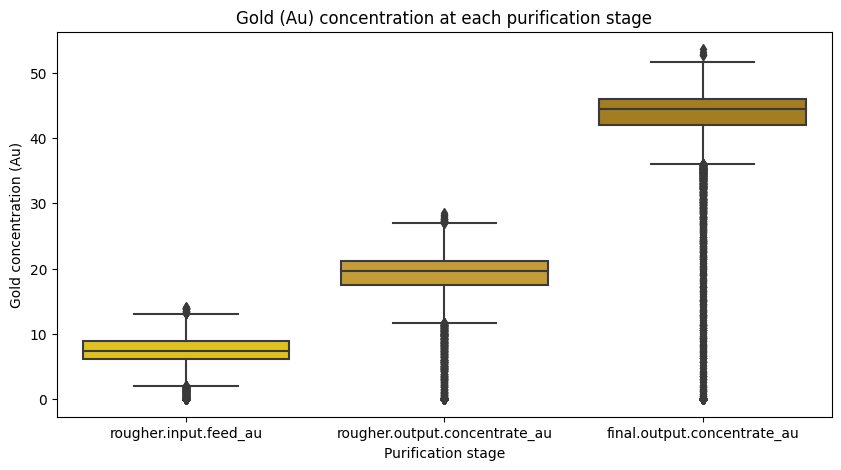

In [89]:
# Determine different shades of gold (Au) color for each purification stage
au_colors = ['#ffd700', '#daa520', '#b8860b']

# Create a box plot with the concentration of gold (Au) at each purification stage
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train[[f'{stage}_au' for stage in stages]], palette=au_colors)
plt.title('Gold (Au) concentration at each purification stage')
plt.xlabel('Purification stage')
plt.ylabel('Gold concentration (Au)')
plt.show()

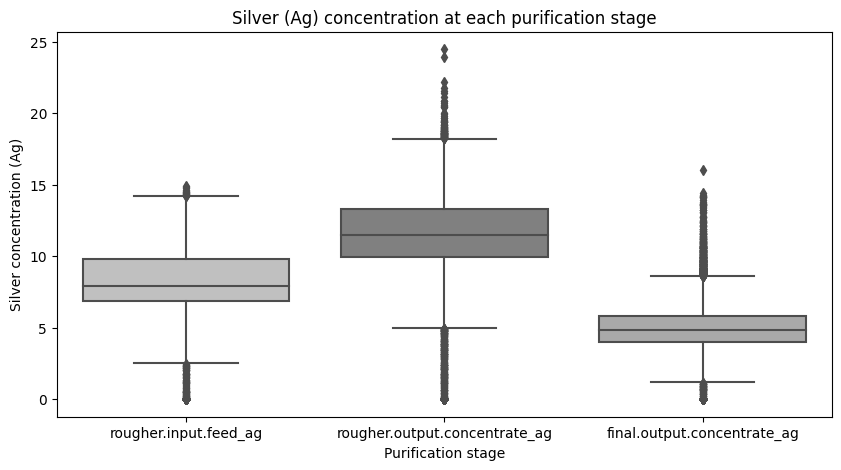

In [90]:
# Determine different shades of silver (Ag) color for each purification stage
ag_colors = ['#c0c0c0', '#808080', '#a9a9a9']

# Create a box plot with the concentration of silver (Ag) at each purification stage
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train[[f'{stage}_ag' for stage in stages]], palette=ag_colors)
plt.title('Silver (Ag) concentration at each purification stage')
plt.xlabel('Purification stage')
plt.ylabel('Silver concentration (Ag)')
plt.show()

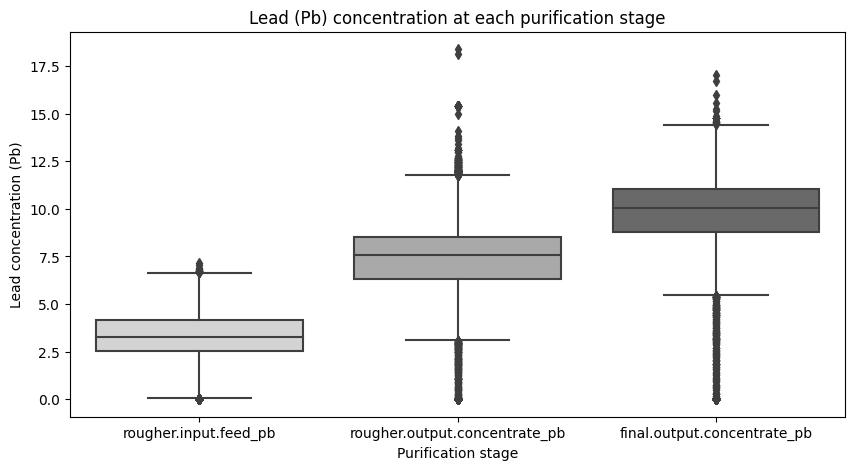

In [91]:
# Determine different shades of lead (Pb) color for each purification stage
pb_colors = ['#d3d3d3', '#a9a9a9', '#696969']

# Create a box plot with the concentration of lead (Pb) at each purification stage
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train[[f'{stage}_pb' for stage in stages]], palette=pb_colors)
plt.title('Lead (Pb) concentration at each purification stage')
plt.xlabel('Purification stage')
plt.ylabel('Lead concentration (Pb)')
plt.show()

### Total concentrations

- `Gold (Au)`: The concentration of gold increases as the process progresses, as expected.
- `Silver (Ag)`: The concentration of silver initially increases but then decreases in the final stage, possibly due to its removal to increase the purity of gold.
- `Lead (Pb)`: The concentration of lead increases throughout the process.

### Intermediate Conclusion

Overall, these results are consistent with what would be expected from a purification process. However, it would be advisable to look for possible anomalies in the data, such as outliers or unusually low or high concentrations, as they can affect the performance of the model.

## Comparison of Particle Size Distributions

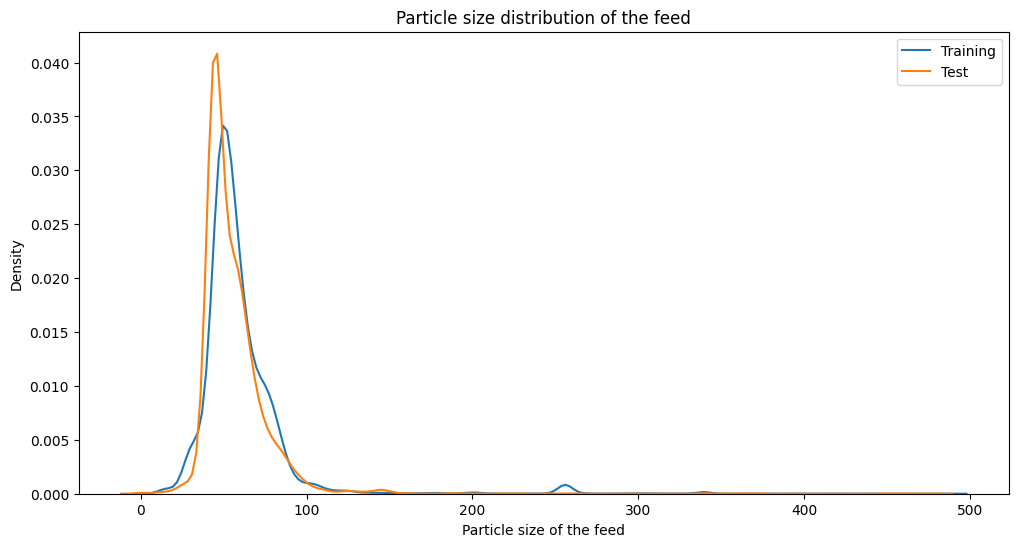

In [92]:
# Compare the size distributions of the particles in the feed in the training set and in the test set
plt.figure(figsize=(12, 6))
sns.kdeplot(df_train['rougher.input.feed_size'], label='Training')
sns.kdeplot(df_test['rougher.input.feed_size'], label='Test')
plt.title('Particle size distribution of the feed')
plt.xlabel('Particle size of the feed')
plt.ylabel('Density')
plt.legend()
plt.show()

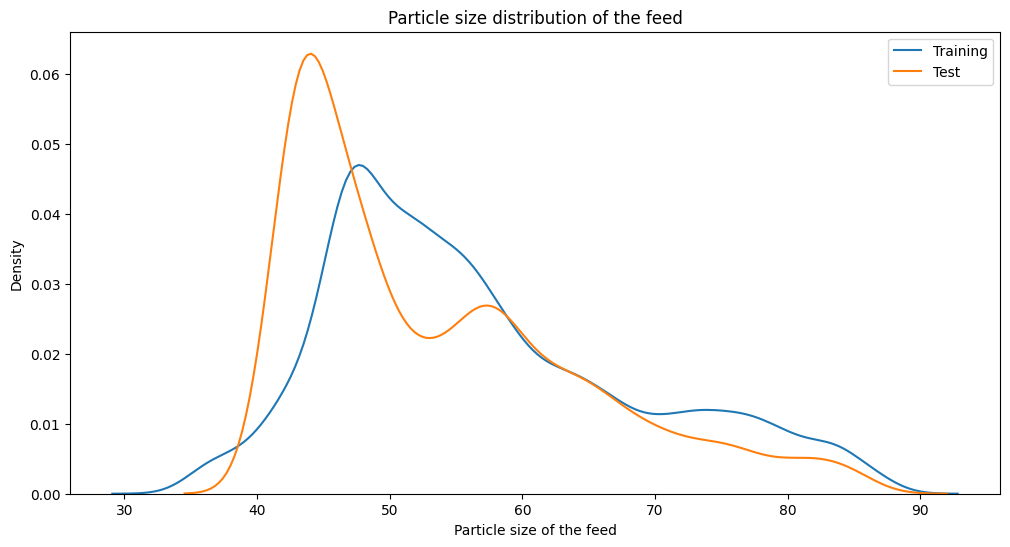

In [93]:
# Remove outliers in both the training and test datasets for the particle size of the feed

# Define the limits of the quantiles
lower_bound = 0.05
upper_bound = 0.95

# Calculate quantiles for the particle size of the feed in the training set
q_lower_train = df_train['rougher.input.feed_size'].quantile(lower_bound)
q_upper_train = df_train['rougher.input.feed_size'].quantile(upper_bound)

# Calculate quantiles for the particle size of the feed in the test set
q_lower_test = df_test['rougher.input.feed_size'].quantile(lower_bound)
q_upper_test = df_test['rougher.input.feed_size'].quantile(upper_bound)

# Remove outliers in the training set
df_train = df_train[df_train['rougher.input.feed_size'] > q_lower_train]
df_train = df_train[df_train['rougher.input.feed_size'] < q_upper_train]

# Remove outliers in the test set
df_test = df_test[df_test['rougher.input.feed_size'] > q_lower_test]
df_test = df_test[df_test['rougher.input.feed_size'] < q_upper_test]

# Compare the size distributions of the particles in the feed in the training set and in the test set
plt.figure(figsize=(12, 6))
sns.kdeplot(df_train['rougher.input.feed_size'], label='Training')
sns.kdeplot(df_test['rougher.input.feed_size'], label='Test')
plt.title('Particle size distribution of the feed')
plt.xlabel('Particle size of the feed')
plt.ylabel('Density')
plt.legend()
plt.show()

In [94]:
# Check if the distributions of particle sizes in the training set and test set are equal
alpha = 0.05
results = st.ttest_ind(df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size'])

# H0: Distributions do not vary significantly
# H1: Distributions vary significantly
if (results.pvalue < alpha):
    print('The null hypothesis is rejected. Distributions vary significantly.')
else:
    print('The null hypothesis is not rejected. Distributions do not vary significantly.')

The null hypothesis is rejected. Distributions vary significantly.


### Intermediate Conclusion

The distributions of the particle feed vary significantly between the training set and the test set.

# Prepare data

## Total concentrations of all substances in the different purification stages

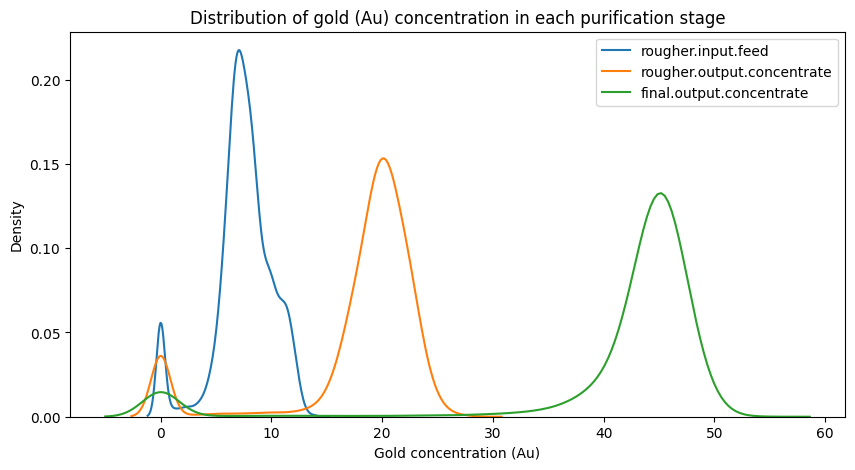

In [95]:
# Show the distribution of gold (Au) concentration in each purification stage
ig, ax = plt.subplots(figsize=(10, 5))
for stage in stages:
    sns.kdeplot(df_train[f'{stage}_au'], label=stage, ax=ax)
plt.title('Distribution of gold (Au) concentration in each purification stage')
plt.xlabel('Gold concentration (Au)')
plt.ylabel('Density')
plt.legend()
plt.show()

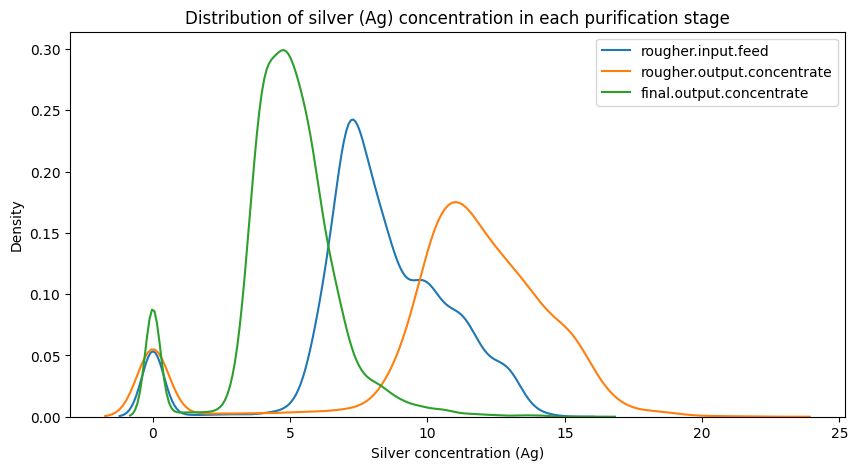

In [96]:
# Show the distribution of silver (Ag) concentration in each purification stage
ig, ax = plt.subplots(figsize=(10, 5))
for stage in stages:
    sns.kdeplot(df_train[f'{stage}_ag'], label=stage, ax=ax)
plt.title('Distribution of silver (Ag) concentration in each purification stage')
plt.xlabel('Silver concentration (Ag)')
plt.ylabel('Density')
plt.legend()
plt.show()

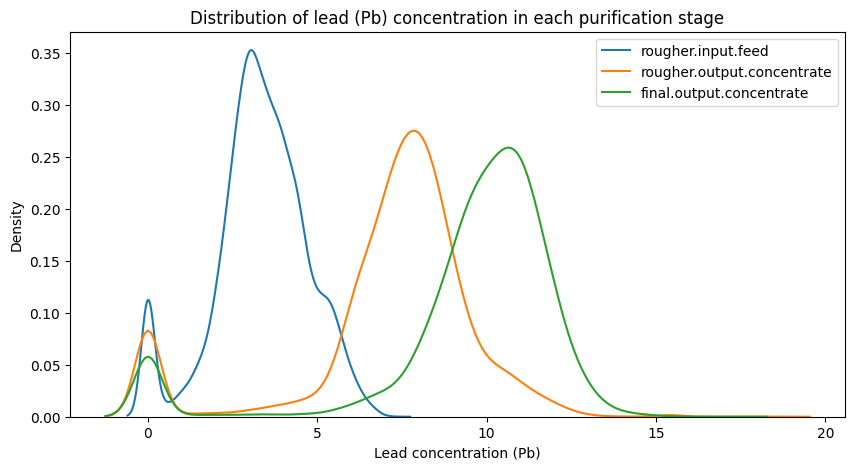

In [97]:
# Show the distribution of lead (Pb) concentration in each purification stage
ig, ax = plt.subplots(figsize=(10, 5))
for stage in stages:
    sns.kdeplot(df_train[f'{stage}_pb'], label=stage, ax=ax)
plt.title('Distribution of lead (Pb) concentration in each purification stage')
plt.xlabel('Lead concentration (Pb)')
plt.ylabel('Density')
plt.legend()
plt.show()

### Intermediate Conclusion

The distributions of the total concentrations of all substances in the different purification stages contain anomalies close to zero, so it would be necessary to remove these anomalies in order to train the model correctly.

## Remove outliers

In [98]:
# Define lower and upper bounds for the quantiles
lower_bound = 0.05
upper_bound = 0.95

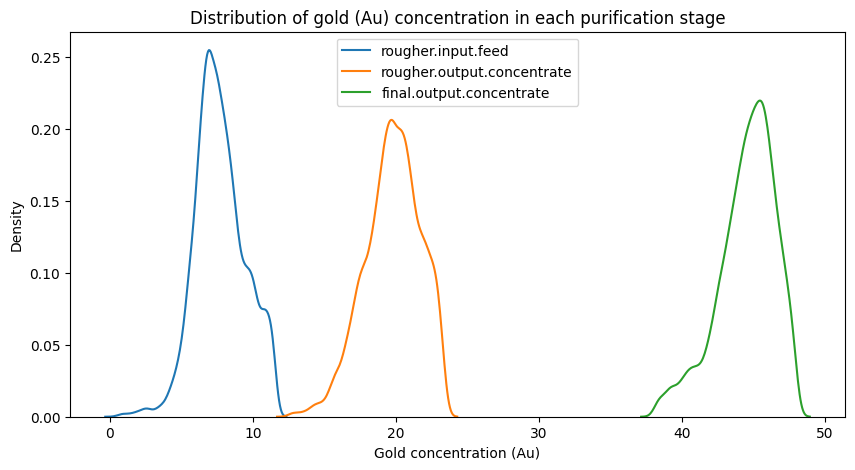

In [99]:
# Remove outliers in the distributions of gold (Au) concentrations at different purification stages in the training set
for stage in stages:
    q_low = df_train[f'{stage}_au'].quantile(lower_bound)
    q_hi  = df_train[f'{stage}_au'].quantile(upper_bound)
    df_train = df_train[(df_train[f'{stage}_au'] < q_hi) & (df_train[f'{stage}_au'] > q_low)]

# Show the distribution of gold (Au) concentration in each purification stage
ig, ax = plt.subplots(figsize=(10, 5))
for stage in stages:
    sns.kdeplot(df_train[f'{stage}_au'], label=stage, ax=ax)
plt.title('Distribution of gold (Au) concentration in each purification stage')
plt.xlabel('Gold concentration (Au)')
plt.ylabel('Density')
plt.legend()
plt.show()

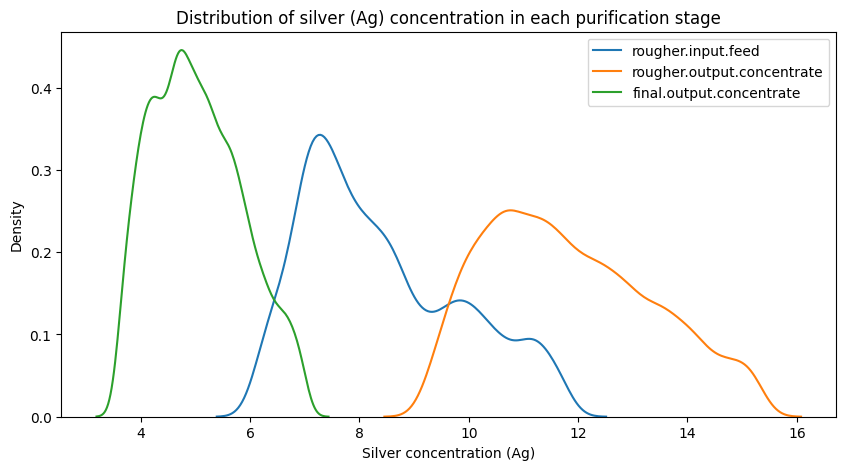

In [100]:
# Remove outliers in the distributions of silver (Ag) concentrations in different purification stages in the training set
for stage in stages:
    q_low = df_train[f'{stage}_ag'].quantile(lower_bound)
    q_hi  = df_train[f'{stage}_ag'].quantile(upper_bound)
    df_train = df_train[(df_train[f'{stage}_ag'] < q_hi) & (df_train[f'{stage}_ag'] > q_low)]

# Show the distribution of silver (Ag) concentration in each purification stage
ig, ax = plt.subplots(figsize=(10, 5))
for stage in stages:
    sns.kdeplot(df_train[f'{stage}_ag'], label=stage, ax=ax)
plt.title('Distribution of silver (Ag) concentration in each purification stage')
plt.xlabel('Silver concentration (Ag)')
plt.ylabel('Density')
plt.legend()
plt.show()

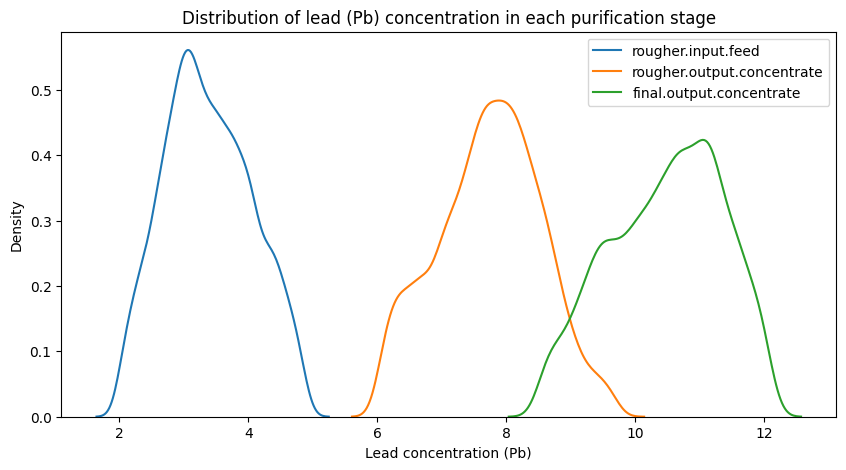

In [101]:
# Remove outliers in the distributions of lead (Pb) concentrations in different purification stages in the training set
for stage in stages:
    q_low = df_train[f'{stage}_pb'].quantile(lower_bound)
    q_hi  = df_train[f'{stage}_pb'].quantile(upper_bound)
    df_train = df_train[(df_train[f'{stage}_pb'] < q_hi) & (df_train[f'{stage}_pb'] > q_low)]

# Show the distribution of lead (Pb) concentration in each purification stage
ig, ax = plt.subplots(figsize=(10, 5))
for stage in stages:
    sns.kdeplot(df_train[f'{stage}_pb'], label=stage, ax=ax)
plt.title('Distribution of lead (Pb) concentration in each purification stage')
plt.xlabel('Lead concentration (Pb)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Model Construction

## Function to calculate the final sMAPE value

    sMAPE = (1 / N) * sum(abs(y - y_pred) / ((abs(y) + abs(y_pred)) / 2)) * 100%
    sMAPE final = 25% * sMAPE(rougher) + 75% * sMAPE(final)

In [102]:
# Create a function to calculate sMAPE value
def smape(y, y_pred):
    return (1 / len(y)) * np.sum(np.abs(y - y_pred) / ((np.abs(y) + np.abs(y_pred)) / 2)) * 100

# Create a function to calculate final sMAPE value
def final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

## Model Training

`Features chosen for the model`:

- These features provide information about both the quality of the ore and parameters of the flotation and purification process.

- The date feature may be relevant if temporal patterns are identified in the data, although it can also introduce noise if not handled properly.

- Features describing the "state" of machines (rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level, etc.) could be relevant, but this will depend on the relationship between these states and gold extraction efficiency.

In [103]:
# Chosen features for the model
chosen_features = [
    'primary_cleaner.input.sulfate',
    'primary_cleaner.input.depressant',
    'primary_cleaner.input.feed_size',
    'primary_cleaner.input.xanthate',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_rate',
    'rougher.input.feed_size',
    'rougher.input.feed_sol',
    'rougher.input.feed_au',
    'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank10_xanthate',
    'rougher.input.floatbank11_sulfate',
    'rougher.input.floatbank11_xanthate',
]

# Chosen targets for the model
chosen_targets = [
    'rougher.output.recovery',
    'final.output.recovery'
]

In [104]:
# Filter the training set with the chosen features and targets
chosen_train_df = df_train[chosen_features + chosen_targets]

# Filter chosen features on the training set
train_features = chosen_train_df[chosen_features]

# Filter chosen targets on the training set
train_targets = chosen_train_df[chosen_targets]

# Filter chosen features on the test set
test_features = df_test[chosen_features]

# Filter chosen targets on the full set for testing
test_targets = df_full[df_full.index.isin(df_test.index)][chosen_targets]

# Size of training sets (features and targets)
print('Size of train_features:', train_features.shape)
print('Size of train_targets:', train_targets.shape, '\n')

# Size of test sets (features and targets)
print('Size of test_features:', test_features.shape)
print('Size of test_targets:', test_targets.shape)

Size of train_features: (5852, 14)
Size of train_targets: (5852, 2) 

Size of test_features: (5270, 14)
Size of test_targets: (5270, 2)


### Find the best hyperparameters for each model

In [105]:
# Create a function to find the best hyperparameters
def find_best_params(model, param_grid, train_features, train_targets):
    # Perform a grid search of the hyperparameters
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid.fit(train_features, train_targets)
    
    # Print the best hyperparameters and the best score
    print('Model type:', type(model).__name__)
    print('Best parameters:', grid.best_params_)
    print('Best score:', np.abs(grid.best_score_))

In [106]:
# Define hyperparameters to test
param_grid_lr = {}
param_grid_rf = {'n_estimators': np.arange(50, 201, 50), 'max_depth': np.arange(3, 15)}
param_grid_dt = {'max_depth': np.arange(3, 15)}

In [107]:
# Find the best hyperparameters
model_lr = LinearRegression()
find_best_params(model_lr, param_grid_lr, train_features, train_targets)

model_rf = RandomForestRegressor(random_state=12345)
find_best_params(model_rf, param_grid_rf, train_features, train_targets)

model_dt = DecisionTreeRegressor(random_state=12345)
find_best_params(model_dt, param_grid_dt, train_features, train_targets)

### Intermediate Conclusion

The following were the best hyperparameters obtained for each model using grid search with cross-validation (`GridSearchCV`):

- `Linear Regression`: {}
- `Random Forest`: {'max_depth': 5, 'n_estimators': 50}
- `Decision Tree`: {'max_depth': 3}

In [108]:
# Create function to train and evaluate each model
def train_and_evaluate(model, train_features, train_targets, test_features, test_targets):
    model.fit(train_features, train_targets)
    predictions = model.predict(test_features)
    smape_rougher = smape(test_targets['rougher.output.recovery'], predictions[:, 0])
    smape_final = smape(test_targets['final.output.recovery'], predictions[:, 1])
    final_smape_score = final_smape(smape_rougher, smape_final)
    print('sMAPE rougher:', smape_rougher)
    print('sMAPE final:', smape_final)
    print('sMAPE final total:', final_smape_score)

### Linear Regression

In [109]:
# Create linear regression model
model_lr = LinearRegression()

# Train and evaluate linear regression model
train_and_evaluate(model_lr, train_features, train_targets, test_features, test_targets)

sMAPE rougher: 19.14442482032417
sMAPE final: 17.622899226720104
sMAPE final total: 18.00328062512112


### Random Forest

In [110]:
# Create random forest regression model
model_rf = RandomForestRegressor(random_state=12345, n_estimators=50, max_depth=5)

# Train and evaluate random forest regression model
train_and_evaluate(model_rf, train_features, train_targets, test_features, test_targets)

sMAPE rougher: 18.121233605724782
sMAPE final: 16.670801774686915
sMAPE final total: 17.03340973244638


### Decision Tree

In [111]:
# Create decision tree regression model
model_dt = DecisionTreeRegressor(random_state=12345, max_depth=3)

# Train and evaluate decision tree regression model
train_and_evaluate(model_dt, train_features, train_targets, test_features, test_targets)


sMAPE rougher: 17.19936835740275
sMAPE final: 15.185535540353493
sMAPE final total: 15.688993744615807


### Intermediate Conclusion

- `Linear Regression`: Provides a final sMAPE of 18.00%, good but not the best.
- `Random Forest`: With hyperparameter tuning (maximum depth of 5 and 50 estimators), it offers an improved final sMAPE of 17.03%.
- `Decision Tree`: Despite its simplicity, with a maximum depth of 3, it achieved the lowest final sMAPE of 15.69%, outperforming the other models.

# General Conclusion

During this project, we created linear regression, random forest, and decision tree models to forecast gold recovery based on purification process features. We used cross-validation to evaluate the accuracy and robustness of the models.

- Cross-validation was used to estimate prediction uncertainty and determine the accuracy and robustness of the models.
- The `Decision Tree` model with a `maximum depth of 3` demonstrated the lowest final sMAPE, indicating the best accuracy among the models.

In conclusion, the `Decision Tree model with a maximum depth of 3` proved to be most suitable for predicting gold recovery, achieving a lowest final sMAPE of 15.69%, indicating high precision and robustness.

Here are the results from the chosen model:
- `Rougher sMAPE`: **17.20%**
- `Final sMAPE`: **15.19%**
- `Total Final sMAPE`: **15.69%**